# Construct a MOC from an image with a mask

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import mocpy
from astropy.coordinates import Angle, SkyCoord
from astropy.io import fits
from mocpy import MOC, WCS

print(mocpy.__version__)

0.16.2


In [2]:
image_path = "../resources/image_with_mask.fits.gz"

with fits.open(image_path) as hdulist:
    moc = MOC.from_fits_image(hdu=hdulist[0], max_norder=15, mask=hdulist[0].data)

In [3]:
def plot_moc(moc, center, fov, frame):
    """Plot a moc as green with a black border.

    Parameters
    ----------
        moc : mocpy.MOC
            The moc to plot
        center : astropy.coordinates.SkyCoord
            Center of the plot
        fov : astropy.coordinates.Angle
            Aperture of the field of view
        frame : string
            The frame of the view.
    """
    fig = plt.figure(111, figsize=(15, 5))

    with WCS(
        fig,
        fov=fov,
        center=center,
        coordsys=frame,
        rotation=Angle(0, u.degree),
        projection="SIN",
    ) as wcs:
        ax = fig.add_subplot(1, 1, 1, projection=wcs)

        moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
        moc.border(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="black")

    plt.xlabel("ra")
    plt.ylabel("dec")
    plt.grid(color="black", linestyle="dotted")

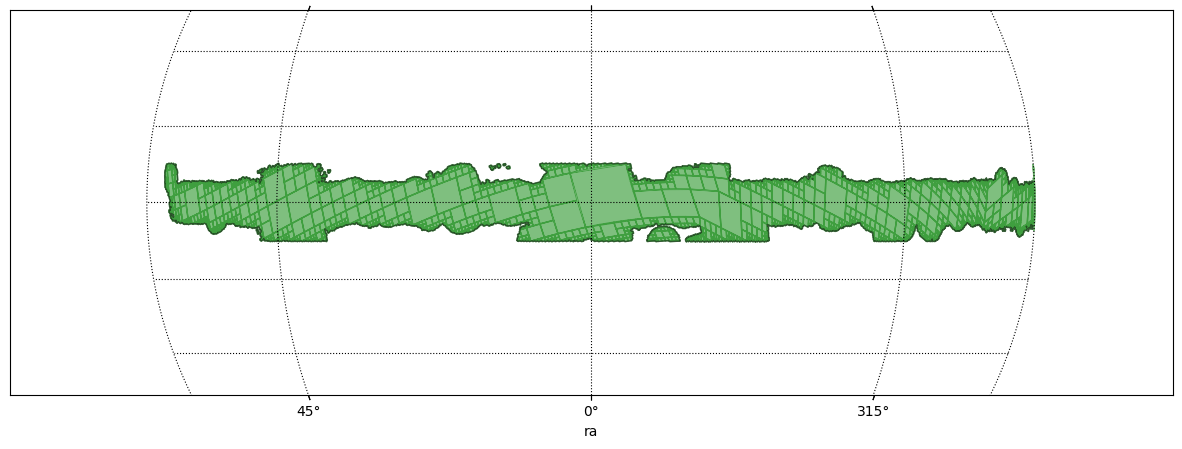

In [4]:
plot_moc(moc, SkyCoord(0, 0, unit="deg", frame="galactic"), 50 * u.deg, "galactic")

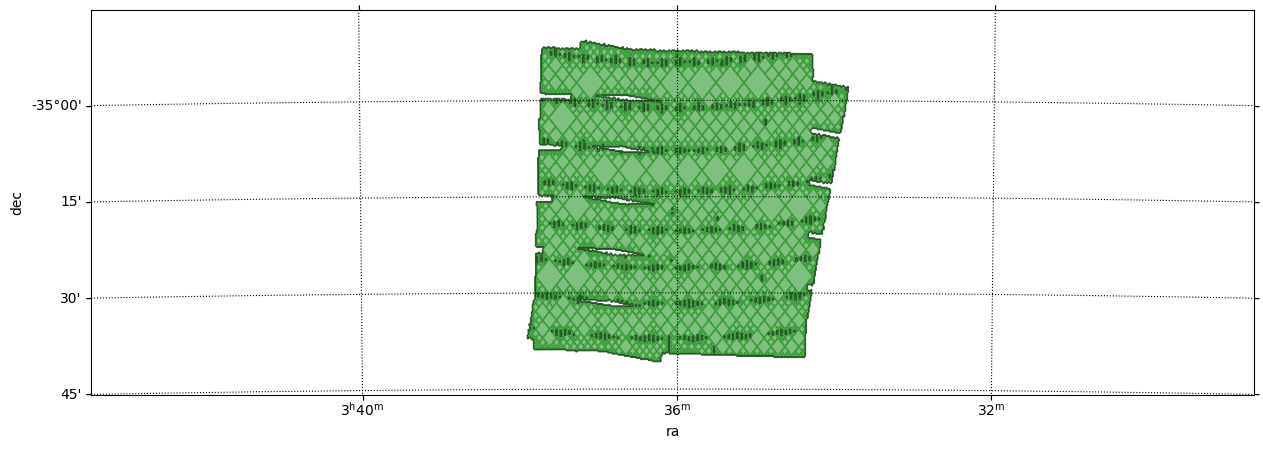

In [5]:
image_path = "../resources/coadd_2exps_LANCZSOS3_noBkgSub_AL_block100.fits.gz"

with fits.open(image_path) as hdulist:
    moc = MOC.from_fits_image(hdu=hdulist[0], max_norder=15, mask=hdulist[0].data)
    plot_moc(
        moc,
        SkyCoord(54.0149974, -35.2651592, unit="deg", frame="icrs"),
        1 * u.deg,
        "icrs",
    )